<a href="https://colab.research.google.com/github/nataliarufino/dailyactivities_RNN/blob/main/Practical_Task_DNN_1_2_Activities_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this task, we must

* Load the UniMiB - SHAR database to classify 17 types of daily
activities;
* Use crossvalidation of 5 folders
* Implement a recurrent neural network architecture to train the model using the
the model using the Sequential class;
* Use the ModelCheckpoint callback method;
* Calculate the accuracy in each folder and the average accuracy
* Show the accuracy and error graphs for the training and validation steps;

# Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, LSTM, GRU, Bidirectional
from tensorflow.keras.models import load_model

Mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Prepare the Data

In [ ]:
path = '/content/drive/MyDrive/Trabalho/'

In [ ]:
data = pd.read_csv(path + 'acc_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,443,444,445,446,447,448,449,450,451,452
0,7.60900,7.32290,7.2815,7.75330,8.04310,8.21590,8.38870,8.578000,8.65840,8.67060,...,-6.3721,-6.3235,-6.4744,-6.4497,-6.4150,-6.5149,-6.5905,-6.5355,-6.4533,-6.1826
1,8.50770,8.48090,8.7478,8.86400,8.86400,8.45840,7.78230,7.412000,7.58910,7.70920,...,-6.7854,-6.5840,-6.2916,-6.4725,-6.6268,-6.7745,-6.9297,-6.8467,-6.7045,-6.5133
2,8.44200,8.63210,8.7300,8.69770,8.55260,8.05750,0.39589,-0.090756,-0.33558,-0.50758,...,-6.4035,-6.4508,-6.6128,-6.8305,-6.8725,-7.2498,-7.4149,-7.2786,-7.1271,-6.8320
3,-11.02600,-11.71500,-11.7650,-9.94460,-7.66020,-6.88220,-7.60130,-9.161300,-10.33900,-11.04700,...,-7.7156,-7.7643,-7.7556,-8.0408,-8.0920,-7.8179,-7.7690,-7.6871,-7.7955,-7.8193
4,0.23847,0.32155,0.3838,0.49577,0.66456,0.77626,1.01960,1.010600,0.85041,0.47392,...,-7.6149,-7.5536,-7.3810,-7.3245,-7.4731,-7.4415,-7.5462,-7.4749,-7.4417,-7.4125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11766,1.00570,1.00620,1.0686,0.97192,1.08920,1.02280,1.07360,1.111900,1.08860,1.09360,...,9.3160,9.3678,9.3522,9.4383,9.4612,9.4262,9.4118,9.3147,9.4097,9.4362
11767,1.06860,0.97192,1.0892,1.02280,1.07360,1.11190,1.08860,1.093600,1.03580,1.07440,...,9.3522,9.4383,9.4612,9.4262,9.4118,9.3147,9.4097,9.4362,9.4746,9.4495
11768,1.07360,1.11190,1.0886,1.09360,1.03580,1.07440,1.12890,1.188500,1.13230,1.14780,...,9.4118,9.3147,9.4097,9.4362,9.4746,9.4495,9.3998,9.5013,9.4645,9.4236
11769,1.22350,1.24220,1.2697,1.34650,1.35410,1.32590,1.28020,1.305400,1.34980,1.30360,...,9.4553,9.2990,9.4050,9.4514,9.4645,9.4417,9.4662,9.3496,9.3496,9.3496


In [ ]:
labels = pd.read_csv(path+'acc_labels.csv', header=None)
labels

,0,1,2
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,2
4,1,1,2
...,...,...,...
11766,17,30,6
11767,17,30,6
11768,17,30,6
11769,17,30,6


Define x

In [ ]:
X = data.values

In [ ]:
X

array([[ 7.609 ,  7.3229,  7.2815, ..., -6.5355, -6.4533, -6.1826],
       [ 8.5077,  8.4809,  8.7478, ..., -6.8467, -6.7045, -6.5133],
       [ 8.442 ,  8.6321,  8.73  , ..., -7.2786, -7.1271, -6.832 ],
       ...,
       [ 1.0736,  1.1119,  1.0886, ...,  9.5013,  9.4645,  9.4236],
       [ 1.2235,  1.2422,  1.2697, ...,  9.3496,  9.3496,  9.3496],
       [ 1.3259,  1.2802,  1.3054, ...,  9.3496,  9.3496,  9.3496]])

Define y

In [ ]:
y = labels.iloc[:, 0].values
y

array([ 1,  1,  1, ..., 17, 17, 17])

In [ ]:
y = y - 1
y

array([ 0,  0,  0, ..., 16, 16, 16])

## Transforming the input shape

The transformation of input_shape from `[samples, features]` to `[samples, timesteps, features]` involves adding a time dimension (timesteps) to the input data.

In [ ]:
X.shape

(11771, 453)

The function `change_shape` reshapes the input data before feeding it into a model

In [ ]:
def change_shape(X):
  X_x = X[:, 0:151]
  X_y = X[:, 151:302]
  X_z = X[:, 302:453]

  X_new = np.dstack([X_x, X_y, X_z])

  return X_new

In [ ]:
X_new = change_shape(X)

In [ ]:
X_new.shape

(11771, 151, 3)

## Build/train the model

Inside a loop for each fold:

* The data was split into training and validation sets specific to the current fold.
* An RNN model was created using Keras, which included LSTM layers for sequence processing.
* The model was compiled by specifying an optimizer and a loss function.
* A callback was set up to save the best model based on its validation accuracy during training.
* The model was trained using the training data for a specified number of epochs and batch size.
* After training, the model was evaluated on the validation data, and metrics such as accuracy and loss were printed out.
* The accuracy, loss, and training history were stored for later analysis.
* The best model for the current fold was saved.

In [ ]:
# Define the number of folds
num_folds = 5

# Create the neural network model (outside the loop)
def create_model():
    model = Sequential([InputLayer(input_shape=(151, 3)),
                        LSTM(units=64, return_sequences=True),
                        LSTM(units=32, return_sequences=True),
                        LSTM(units=16),
                        Dense(units=17, activation='softmax')])
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

accuracy_scores = []  # Store accuracy
loss_scores = []      # Store loss
epochs = 30            # Number of training epochs
batch_size = 12       # Batch size
histories = []
x_train_fold_save = []
y_train_fold_save = []
confusion_matrices = []  # Store confusion matrices

# Split the data into training and validation sets using StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

# Loop over each fold
for fold_num, (train_idx, val_idx) in enumerate(kf.split(X_new, y)):
    print(f"Training Fold {fold_num + 1}...")

    # Split the data into training and validation sets for this fold
    x_train_fold, x_val_fold = X_new[train_idx], X_new[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    model = create_model()

    callbacks = [tf.keras.callbacks.ModelCheckpoint('best_model_of_fold.h5',
                                               monitor='val_accuracy',
                                               verbose=1, save_best_only=True)]

    history = model.fit(x_train_fold, y_train_fold,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        validation_data=(x_val_fold, y_val_fold),
                        callbacks=callbacks)

    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    print(f"Validation Accuracy for Fold {fold_num + 1}: {val_accuracy}")
    print(f"Validation Loss for Fold {fold_num + 1}: {val_loss}")

    # Store the accuracy and loss for this fold
    accuracy_scores.append(val_accuracy)
    loss_scores.append(val_loss)
    histories.append(history)
    x_train_fold_save.append(x_train_fold)

    # Load the best model for this fold
    best_model = load_model('best_model_of_fold.h5')

    # Use the test data defined earlier for this fold
    y_pred = np.argmax(best_model.predict(x_test_fold), axis=-1)

    # Calculate the confusion matrix for this fold and add to the list
    fold_confusion = confusion_matrix(y_test_fold, y_pred)
    confusion_matrices.append(fold_confusion)

# Calculate and print the average accuracy and average loss across all folds
average_accuracy = np.mean(accuracy_scores)
average_loss = np.mean(loss_scores)
print(f"Average Accuracy across {num_folds} Folds: {average_accuracy}")
print(f"Average Loss across {num_folds} Folds: {average_loss}")

Training Fold 1...

Epoch 1: val_accuracy improved from -inf to 0.39108, saving model to best_model_of_fold.h5

Epoch 2: val_accuracy improved from 0.39108 to 0.44501, saving model to best_model_of_fold.h5

Epoch 3: val_accuracy improved from 0.44501 to 0.51507, saving model to best_model_of_fold.h5

Epoch 4: val_accuracy improved from 0.51507 to 0.52781, saving model to best_model_of_fold.h5

Epoch 5: val_accuracy improved from 0.52781 to 0.61444, saving model to best_model_of_fold.h5

Epoch 6: val_accuracy improved from 0.61444 to 0.66030, saving model to best_model_of_fold.h5

Epoch 7: val_accuracy improved from 0.66030 to 0.67813, saving model to best_model_of_fold.h5

Epoch 8: val_accuracy improved from 0.67813 to 0.70658, saving model to best_model_of_fold.h5

Epoch 9: val_accuracy improved from 0.70658 to 0.72484, saving model to best_model_of_fold.h5

Epoch 10: val_accuracy improved from 0.72484 to 0.72611, saving model to best_model_of_fold.h5

Epoch 11: val_accuracy improved 

Plote the convergence

Training Fold 1...


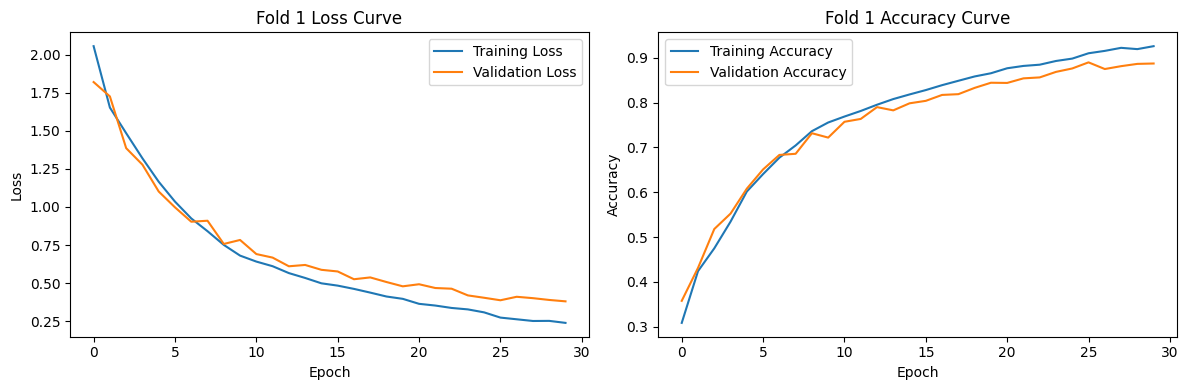

Training Fold 2...


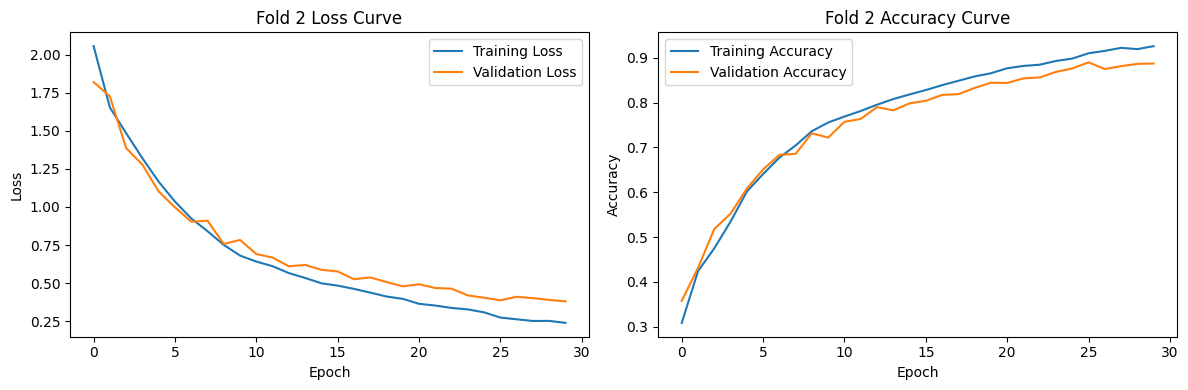

Training Fold 3...


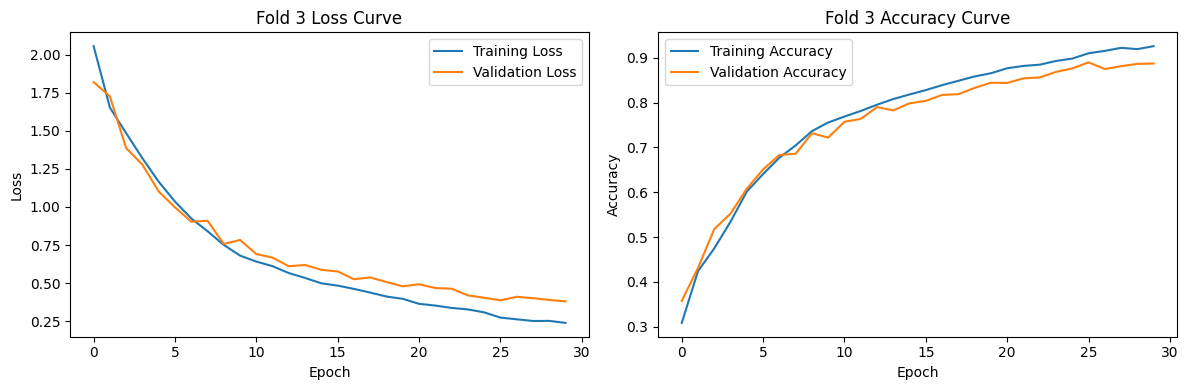

Training Fold 4...


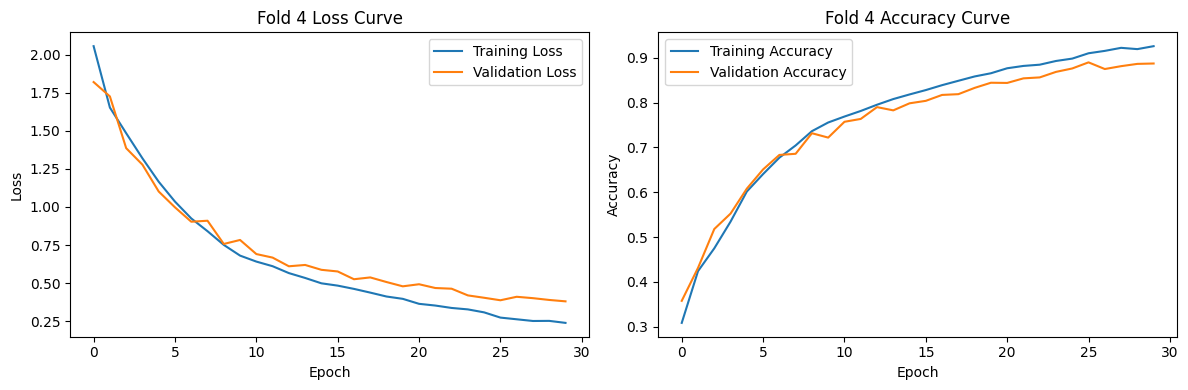

Training Fold 5...


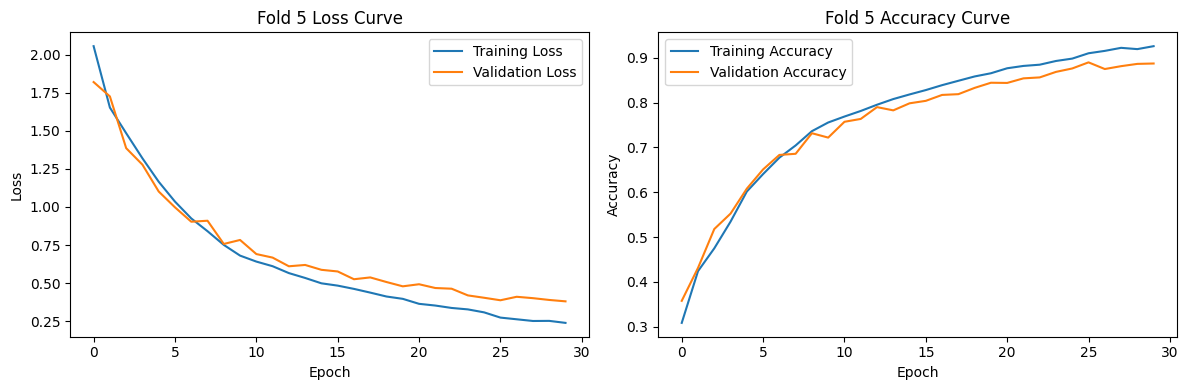

In [ ]:
# Loop over each fold
for fold_num, (train_idx, val_idx) in enumerate(kf.split(X_new, y)):
    print(f"Training Fold {fold_num + 1}...")

    # Plot loss and accuracy curves for this fold
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')acm
    plt.legend()
    plt.title(f'Fold {fold_num + 1} Loss Curve')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Fold {fold_num + 1} Accuracy Curve')

    plt.tight_layout()
    plt.show()

## Evaluate the model

In general, higher validation accuracy indicates better performance, while lower validation loss suggests that the model is making more accurate predictions. By comparing the validation metrics across all folds, it appears that `Fold 3` has the highest accuracy (0.9078) and the lowest loss (0.3149), indicating that it performed the best among the five folds. However, the differences in accuracy and loss between the folds are relatively small, suggesting that the model's performance is consistent across different subsets of the data.

In [ ]:
for i in range(5):

  path = "/content/best_model_of_fold_{}.h5".format(i)

  m = load_model(path)
  scores = m.evaluate(X_new, y)

  print(scores, '\n')

368/368 [==============================] - 5s 11ms/step - loss: 0.2113 - accuracy: 0.9351
[0.2112894505262375, 0.9350947141647339] 

368/368 [==============================] - 4s 9ms/step - loss: 0.2520 - accuracy: 0.9246
[0.2520275115966797, 0.9245603680610657] 

368/368 [==============================] - 4s 9ms/step - loss: 0.2827 - accuracy: 0.9094
[0.2826788127422333, 0.90943843126297] 

368/368 [==============================] - 5s 9ms/step - loss: 0.2011 - accuracy: 0.9353
[0.20108085870742798, 0.9352646470069885] 

368/368 [==============================] - 4s 8ms/step - loss: 0.2966 - accuracy: 0.9053
[0.2965587079524994, 0.9052757024765015] 



Confusion Matrix - Fold 1:


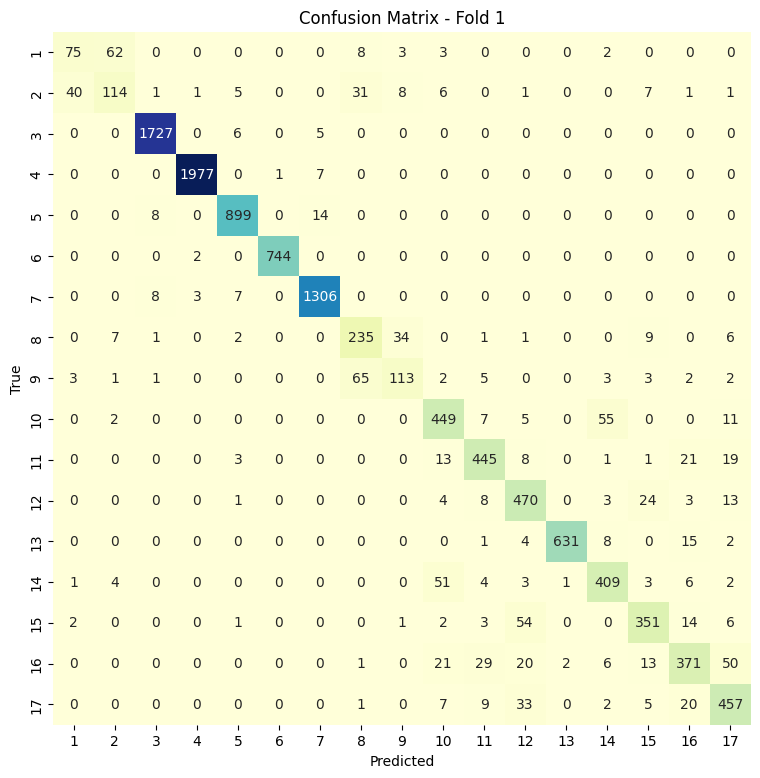

Confusion Matrix - Fold 2:


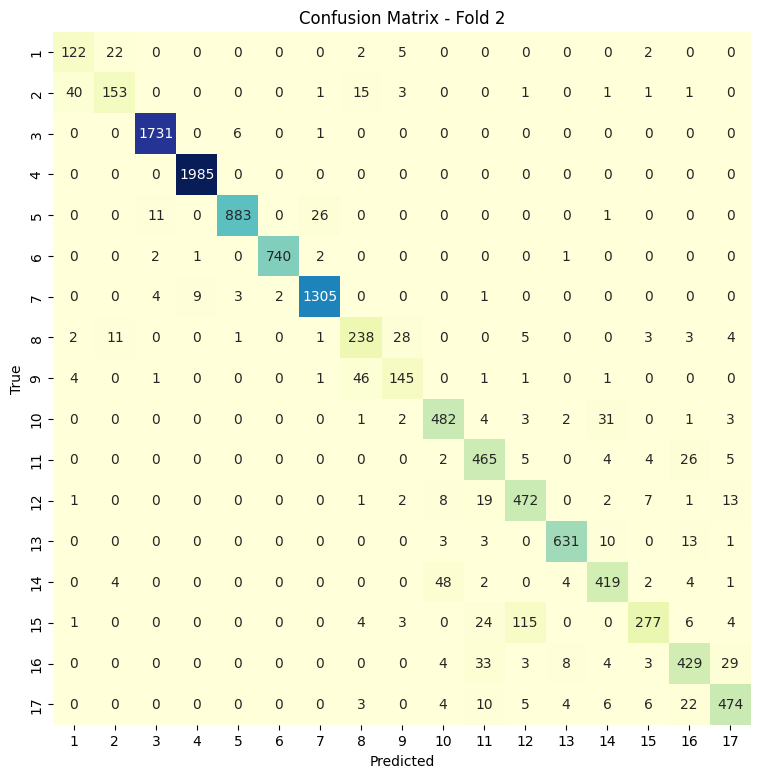

Confusion Matrix - Fold 3:


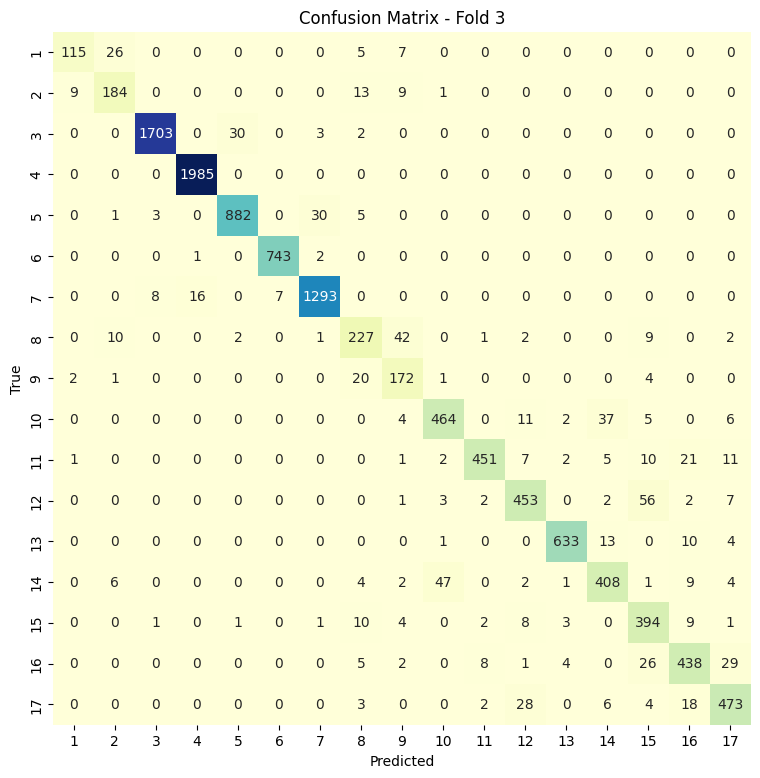

Confusion Matrix - Fold 4:


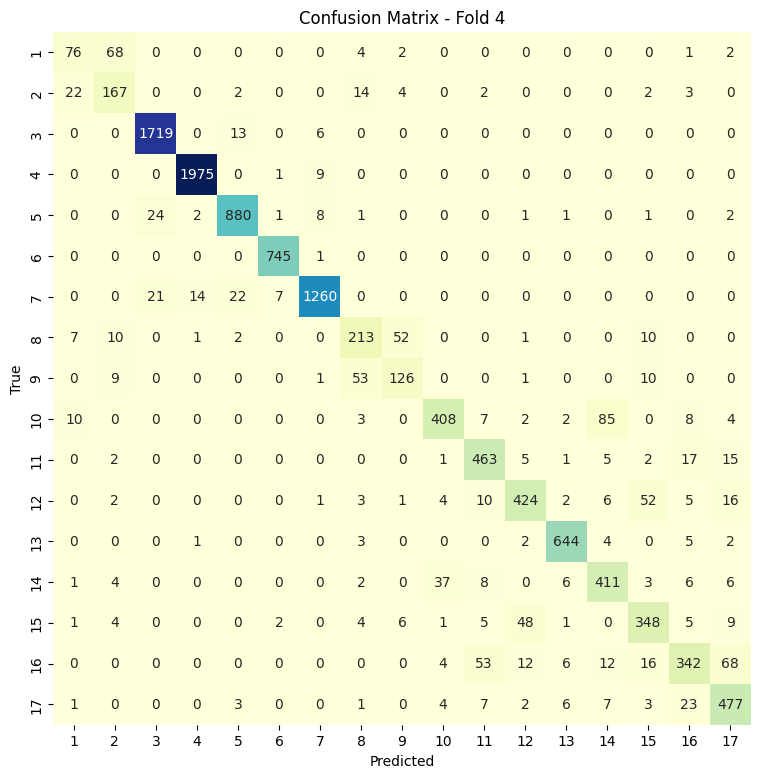

Confusion Matrix - Fold 5:


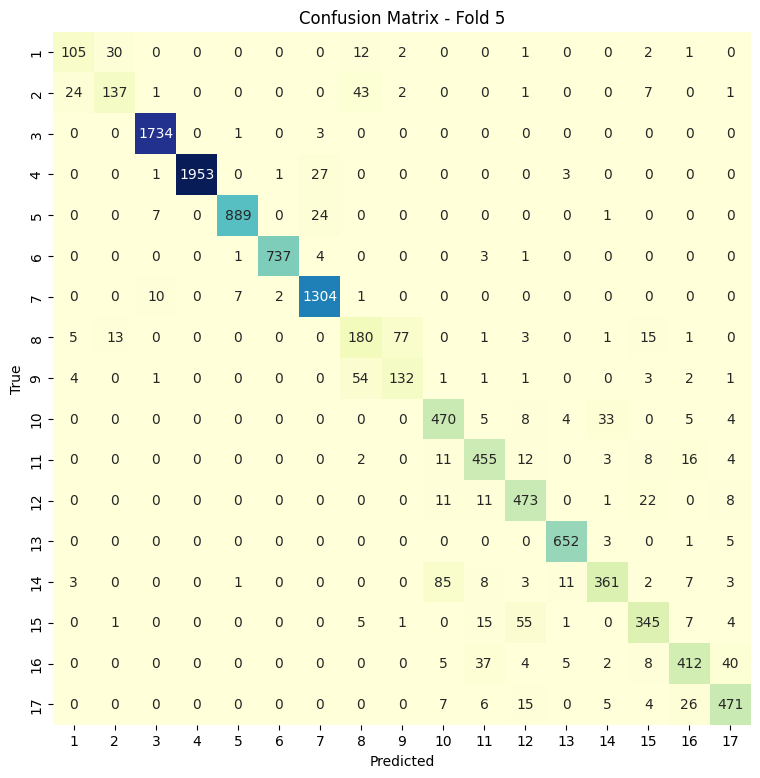

In [ ]:
import seaborn as sn

# Define class labels from 1 to 17
labels = list(range(1, 18))

# Loop over each confusion matrix
for fold_num, confusion_matrix in enumerate(confusion_matrices):
    print(f"Confusion Matrix - Fold {fold_num + 1}:")

    # Create a heatmap using seaborn
    plt.subplots(figsize=(9, 9))
    sn.heatmap(confusion_matrix, cmap='YlGnBu', annot=True, fmt='d', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - Fold {fold_num + 1}")
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

------------------------------------------